In [14]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import ceil
from matplotlib import rc
from datetime import datetime

In [9]:
test_files = './data/test'
weight_file = './data/weights'
# os.makedirs(weight_file, exist_ok=True)

In [10]:
# Load centroids CSV
centroids = pd.read_csv(os.path.join(weight_file, 'centroids.csv'))

# Load data CSV
# data = pd.read_csv(os.path.join(test_files'data.csv'))

centroid_columns = [
    "Centroid_MessageRatio", 
    "Centroid_MediaRatio", 
    "Centroid_QuestionRatio", 
    "Centroid_AvgMessageLength", 
    "Centroid_ParticipationScore"
]

# Define cluster-to-score mapping
cluster_scores = {3: 4, 1: 3, 0: 2, 2: 1}

# Directory containing test files
csv_files = [file for file in os.listdir(test_files) if file.endswith(".csv")]

# Dictionary to store user total scores
user_total_scores = {}

# Process each CSV file
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    input_path = os.path.join(test_files, csv_file)

    # Load the data
    data = pd.read_csv(input_path)
    data_columns = [
        "MessageRatio", 
        "MediaRatio", 
        "QuestionRatio", 
        "AvgMessageLength", 
        "ParticipationScore"
    ]

    # Ensure required columns exist
    if not all(col in data.columns for col in data_columns):
        print(f"Skipping {csv_file}: Required columns are missing.")
        continue

    # Assign clusters based on the closest centroid
    cluster_assignments = []
    for _, row in data.iterrows():
        distances = []
        for _, centroid in centroids.iterrows():
            distance = np.sqrt(
                sum((row[data_col] - centroid[centroid_col]) ** 2 
                    for data_col, centroid_col in zip(data_columns, centroid_columns))
            )
            distances.append(distance)
        closest_cluster = np.argmin(distances)  # Find the closest centroid
        cluster_assignments.append(closest_cluster)

    # Add cluster assignments to the data
    data['AssignedCluster'] = cluster_assignments

    # Assign scores based on cluster assignments
    data['ClusterScore'] = data['AssignedCluster'].map(cluster_scores)

    # Aggregate scores by user
    user_scores = data.groupby("User")['ClusterScore'].sum()

    # Update total scores across all files
    for user, score in user_scores.items():
        if user in user_total_scores:
            user_total_scores[user] += score
        else:
            user_total_scores[user] = score

# Convert the final scores to a DataFrame
final_scores = pd.DataFrame(list(user_total_scores.items()), columns=["User", "TotalScore"])

Processing file: munsik_4_3day_group1.csv
Processing file: munsik_4_3day_group2.csv
Processing file: munsik_4_3day_group3.csv
Processing file: munsik_4_3day_group4.csv


In [11]:
final_scores.head()

,User,TotalScore
0,문식,9
1,은채,9
2,조용성,8


In [15]:

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

Processing file: munsik_4_3day_group1.csv
Processing file: munsik_4_3day_group2.csv
Processing file: munsik_4_3day_group3.csv
Processing file: munsik_4_3day_group4.csv


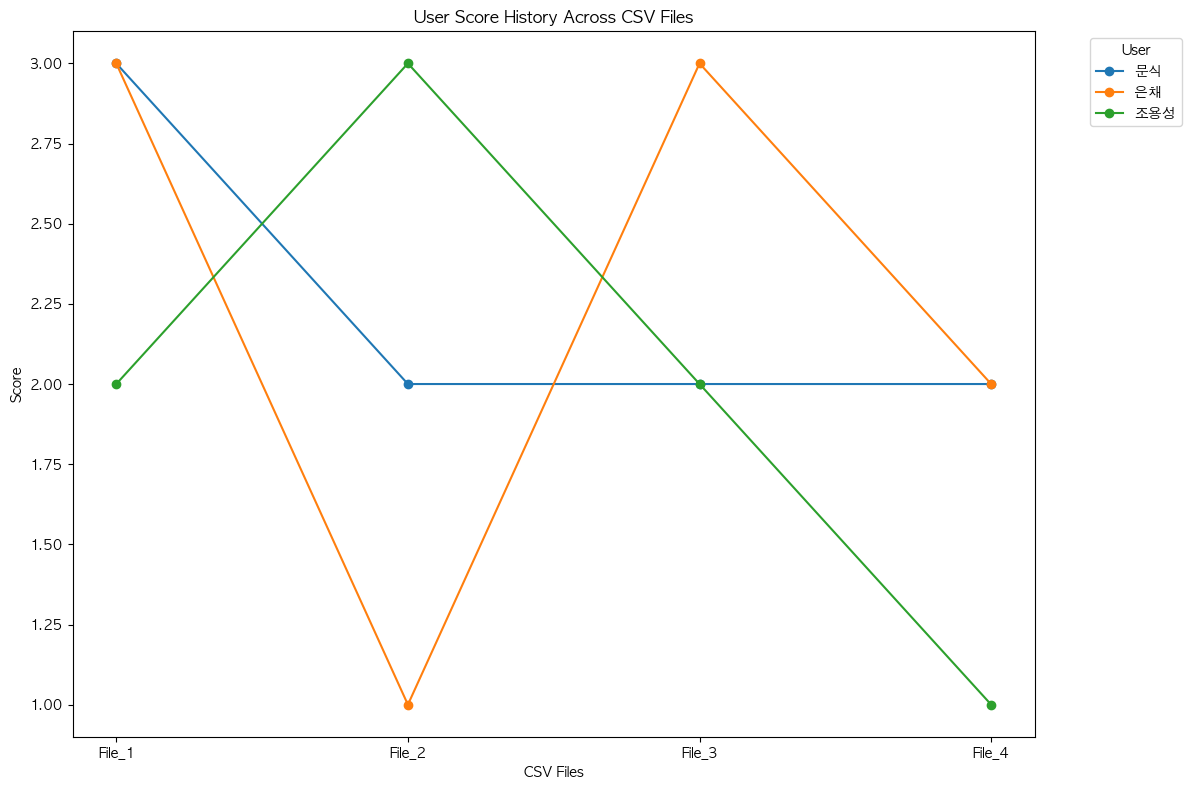

<Figure size 1200x800 with 0 Axes>

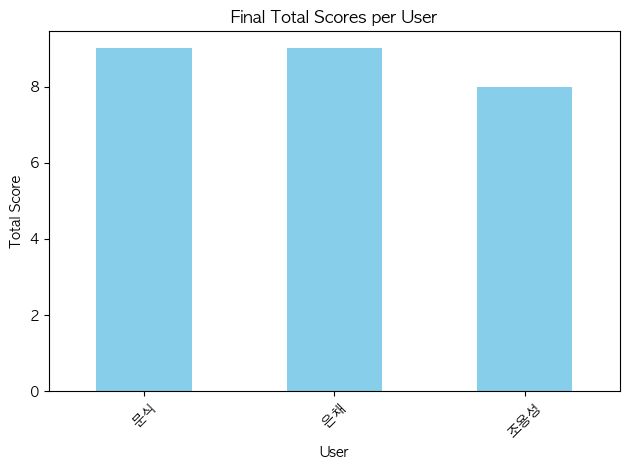

In [17]:
# Load centroids CSV
centroids = pd.read_csv(os.path.join(weight_file, 'centroids.csv'))

centroid_columns = [
    "Centroid_MessageRatio", 
    "Centroid_MediaRatio", 
    "Centroid_QuestionRatio", 
    "Centroid_AvgMessageLength", 
    "Centroid_ParticipationScore"
]

# Define cluster-to-score mapping
cluster_scores = {3: 4, 1: 3, 0: 2, 2: 1}

# Directory containing test files
csv_files = [file for file in os.listdir(test_files) if file.endswith(".csv")]

# Dictionary to store user score history and total scores
user_score_history = {}
user_total_scores = {}

# Process each CSV file
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    input_path = os.path.join(test_files, csv_file)

    # Load the data
    data = pd.read_csv(input_path)
    data_columns = [
        "MessageRatio", 
        "MediaRatio", 
        "QuestionRatio", 
        "AvgMessageLength", 
        "ParticipationScore"
    ]

    # Ensure required columns exist
    if not all(col in data.columns for col in data_columns):
        print(f"Skipping {csv_file}: Required columns are missing.")
        continue

    # Assign clusters based on the closest centroid
    cluster_assignments = []
    for _, row in data.iterrows():
        distances = []
        for _, centroid in centroids.iterrows():
            distance = np.sqrt(
                sum((row[data_col] - centroid[centroid_col]) ** 2 
                    for data_col, centroid_col in zip(data_columns, centroid_columns))
            )
            distances.append(distance)
        closest_cluster = np.argmin(distances)  # Find the closest centroid
        cluster_assignments.append(closest_cluster)

    # Add cluster assignments to the data
    data['AssignedCluster'] = cluster_assignments

    # Assign scores based on cluster assignments
    data['ClusterScore'] = data['AssignedCluster'].map(cluster_scores)

    # Aggregate scores by user
    user_scores = data.groupby("User")['ClusterScore'].sum()

    # Record scores for each user across CSV files
    for user, score in user_scores.items():
        if user not in user_score_history:
            user_score_history[user] = []
        user_score_history[user].append(score)

    # Update total scores
    for user, score in user_scores.items():
        if user in user_total_scores:
            user_total_scores[user] += score
        else:
            user_total_scores[user] = score

# Create a DataFrame for user score history
score_history_df = pd.DataFrame(user_score_history).T
score_history_df.columns = [f"File_{i+1}" for i in range(score_history_df.shape[1])]

# Plot the score history for each User
plt.figure(figsize=(12, 8))
for user in score_history_df.index:
    plt.plot(score_history_df.loc[user], marker='o', label=user)

plt.title("User Score History Across CSV Files")
plt.xlabel("CSV Files")
plt.ylabel("Score")
plt.legend(title="User", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Convert total scores to a DataFrame
final_scores = pd.DataFrame(list(user_total_scores.items()), columns=["User", "TotalScore"])

# Plot a bar chart for final total scores
plt.figure(figsize=(12, 8))
final_scores.set_index("User").sort_values("TotalScore", ascending=False).plot(
    kind="bar", legend=False, title="Final Total Scores per User", ylabel="Total Score", xlabel="User", color='skyblue'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
